<a href="https://colab.research.google.com/github/Panchol211/IP_Core_week-8/blob/main/Independent_Project_Week_8_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFINE THE QUESTION**

# Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid

# **METRICS FOR SUCCESS**

## Analysis the data, clean and build and implement the models  below and determine which model perform better 

# Decision Tress

# Random Forest

# Ada Boost

# Svm

# Support Vector

# **THE CONTEXT**

#Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients and the hospital want to develop an algorithm that can predict if the patient has hypothoid


# Importing all Libraries used in the Project

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

# Import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# More Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC

In [4]:
hyp = pd.read_csv('hypothyroid.csv')
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
hyp.shape

(3163, 26)

In [6]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [7]:
hyp.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [8]:
# Checking for the data types
hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All the datatype are object.

In [9]:
#checking for null values 
hyp.isnull().sum().sort_values(ascending=False)

TBG                          0
TBG_measured                 0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
status                       0
dtype: int64

In [100]:
data_copy = hyp.copy(deep = True)

Plot the statistics column wise to visualize the patterns or trends in data

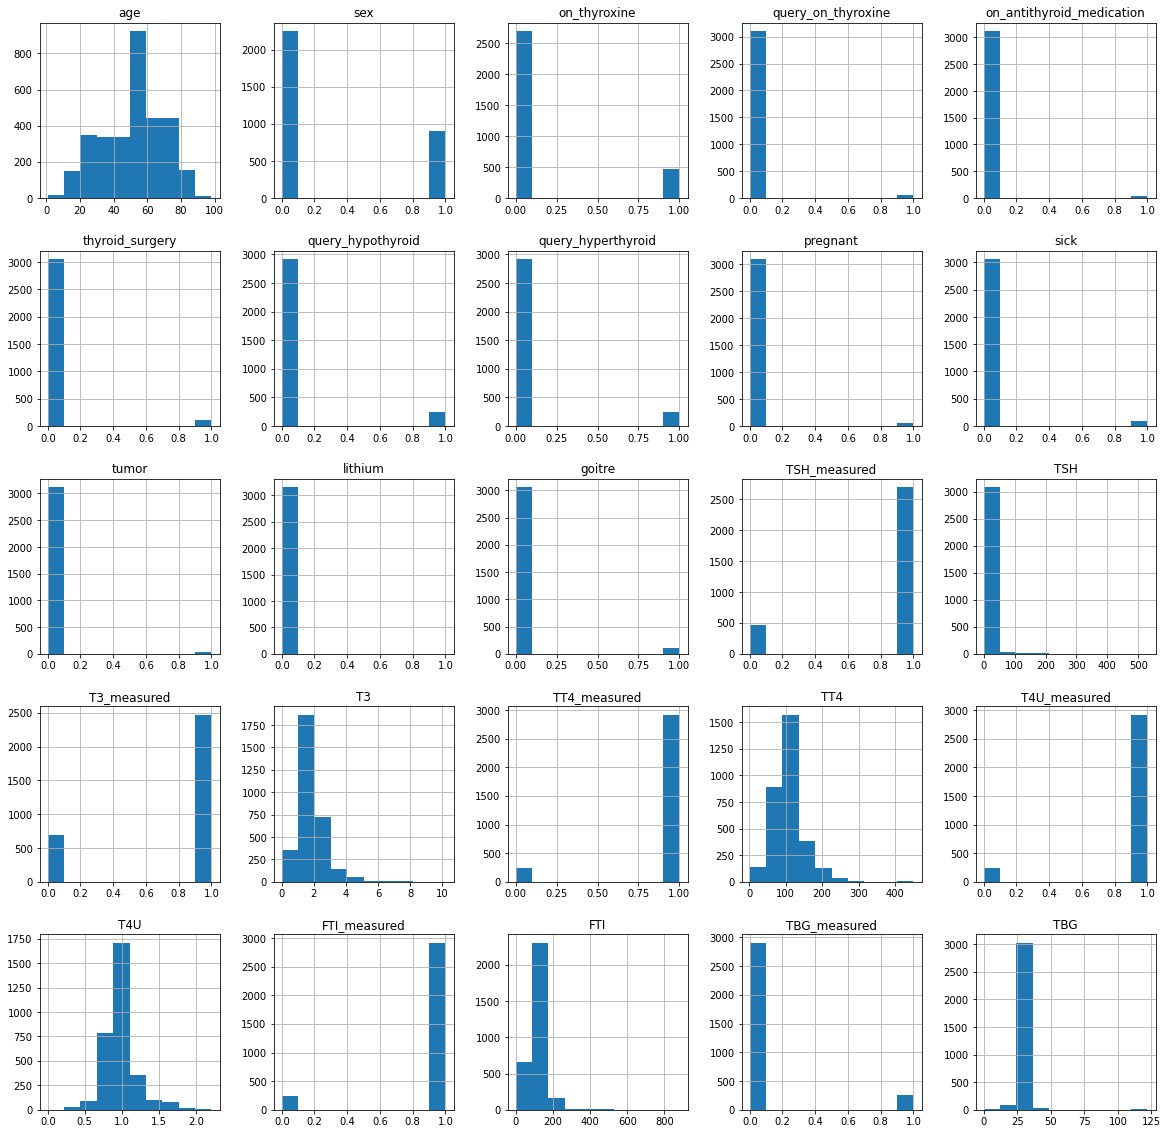

In [102]:
#plotting the distribution of different variables 
p = data_copy.hist(figsize = (20,20))

In [11]:
# Checking for unique values in all columns in the dataset
for uni in hyp.columns:
#   print(hypo.columns)
  print("\t")
  print(hyp[uni].unique())


	
['hypothyroid' 'negative']
	
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
	
['M' 'F' '?']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['y' 'n']
	
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' 

We now replace '?' values in dataset with NaN values so that it becomes easy to count them

In [12]:
hyp.replace('?',np.nan,inplace=True)

In [14]:
# Convert Age, TSH, T3, TT4, T4U, FTI to numerical(Float)
hyp[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]] = hyp[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]].astype(float)

In [13]:
# Converting to categorical data
hyp[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] = hyp[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')

In [15]:
hyp.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [16]:
hyp['sex'] = hyp['sex'].fillna(hyp['sex'].mode()[0])

In [17]:
hyp["sex"].unique()

['M', 'F']
Categories (2, object): ['M', 'F']

Replacing the NaN values with appropriate values

In [18]:
# fill the null values with the  mode
hyp['age'] = hyp['age'].fillna(hyp['age'].mode()[0])
hyp['TSH'] = hyp['TSH'].fillna(hyp['TSH'].mode()[0])
hyp['T3'] = hyp['T3'].fillna(hyp['T3'].mode()[0])
hyp['TT4'] = hyp['TT4'].fillna(hyp['TT4'].mode()[0])
hyp['FTI'] = hyp['FTI'].fillna(hyp['FTI'].mode()[0])
hyp['TBG'] = hyp['TBG'].fillna(hyp['TBG'].mode()[0])                                
hyp['T4U'] = hyp['T4U'].fillna(hyp['T4U'].mode()[0])                      
                                

In [19]:
# fill the null values with the  mode
hyp['lithium'] = hyp['lithium'].fillna(hyp['lithium'].mode()[0])
hyp['goitre'] = hyp['goitre'].fillna(hyp['goitre'].mode()[0])
hyp['on_thyroxine'] = hyp['on_thyroxine'].fillna(hyp['on_thyroxine'].mode()[0])
hyp['query_on_thyroxine'] = hyp['query_on_thyroxine'].fillna(hyp['query_on_thyroxine'].mode()[0])
hyp['on_antithyroid_medication'] = hyp['on_antithyroid_medication'].fillna(hyp['on_antithyroid_medication'].mode()[0])
hyp['thyroid_surgery'] = hyp['thyroid_surgery'].fillna(hyp['thyroid_surgery'].mode()[0])                                
hyp['query_hypothyroid'] = hyp['query_hypothyroid'].fillna(hyp['query_hypothyroid'].mode()[0]) 
hyp['query_hyperthyroid'] = hyp['query_hyperthyroid'].fillna(hyp['query_hyperthyroid'].mode()[0]) 
hyp['pregnant'] = hyp['pregnant'].fillna(hyp['pregnant'].mode()[0])  
hyp['sick'] = hyp['sick'].fillna(hyp['sick'].mode()[0])   
hyp['tumor'] = hyp['tumor'].fillna(hyp['tumor'].mode()[0]) 
hyp['TBG_measured'] = hyp['TBG_measured'].fillna(hyp['TBG_measured'].mode()[0]) 
hyp['status'] = hyp['status'].fillna(hyp['status'].mode()[0]) 
hyp['TSH_measured'] = hyp['TSH_measured'].fillna(hyp['TSH_measured'].mode()[0])   
hyp['T3_measured'] = hyp['T3_measured'].fillna(hyp['T3_measured'].mode()[0])
hyp['TT4_measured'] = hyp['TT4_measured'].fillna(hyp['TT4_measured'].mode()[0])
hyp['T4U_measured'] = hyp['T4U_measured'].fillna(hyp['T4U_measured'].mode()[0])
hyp['FTI_measured'] = hyp['FTI_measured'].fillna(hyp['FTI_measured'].mode()[0])
hyp['sex'] = hyp['sex'].fillna(hyp['sex'].mode()[0])

                                

In [20]:
#checking for null values after converting ? into NAN
hyp.isnull().sum().sort_values(ascending=False)

TBG                          0
TBG_measured                 0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
status                       0
dtype: int64

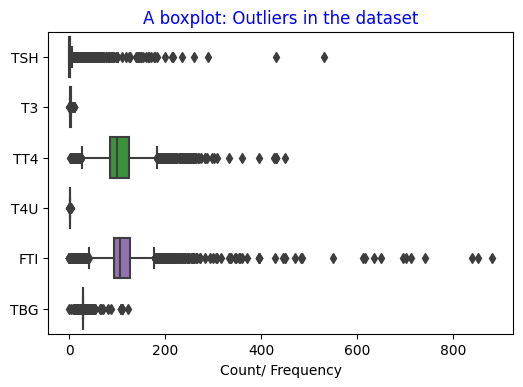

In [21]:
# check for outliers for the
colu = hyp[["TSH", "T3", "TT4", "T4U", "FTI","TBG"]]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = colu , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

There is a lot of outliers in FTI

In [22]:
##counting the number of status in the dataset
hyp['status'].value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [23]:
#counting the number f and t in on_thyroxine
hyp['on_thyroxine'].value_counts()

f    2702
t     461
Name: on_thyroxine, dtype: int64

In [24]:
#counting the number f and t in query_on_thyroxine
hyp['query_on_thyroxine'].value_counts()

f    3108
t      55
Name: query_on_thyroxine, dtype: int64

In [25]:
#counting the number f and t in 'goitre
hyp['goitre'].value_counts()

f    3064
t      99
Name: goitre, dtype: int64

In [26]:
hyp['age'].describe()

count    3163.000000
mean       52.260512
std        18.089308
min         1.000000
25%        38.000000
50%        58.000000
75%        64.000000
max        98.000000
Name: age, dtype: float64

There is no missing values in our dataset after cleaning the data 

In [27]:
#checking for duplicated values in the dataset after through cleaning 
hyp.duplicated().sum()

78

In [ ]:
#hyp1_dup = hyp.drop_duplicates(keep=False)

In [ ]:
#hyp1_dup.duplicated().sum()

In [28]:
# Convert the data type for 'Type' column from object to category
hyp['sex'] = hyp['sex'].astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
#type_label =recipes['Type'].cat.codes
#print(type_label)

#converting gender into 1 and 0
hyp['sex'] = hyp['sex'].cat.codes
print(hyp)

           status   age  sex  ...    FTI TBG_measured   TBG
0     hypothyroid  72.0    1  ...   10.0            n  28.0
1     hypothyroid  15.0    0  ...   17.0            n  28.0
2     hypothyroid  24.0    1  ...    0.0            n  28.0
3     hypothyroid  24.0    0  ...    6.0            n  28.0
4     hypothyroid  77.0    1  ...   44.0            n  28.0
...           ...   ...  ...  ...    ...          ...   ...
3158     negative  58.0    0  ...   95.0            n  28.0
3159     negative  29.0    0  ...   98.0            n  28.0
3160     negative  77.0    1  ...  104.0            n  28.0
3161     negative  74.0    0  ...  137.0            n  28.0
3162     negative  56.0    0  ...  143.0            n  28.0

[3163 rows x 26 columns]


In [29]:
hyp=hyp.replace({"t":1,"f":0})

In [30]:
hyp=hyp.replace({"y":1,"n":0})
print(hyp)

           status   age  sex  ...    FTI  TBG_measured   TBG
0     hypothyroid  72.0    1  ...   10.0             0  28.0
1     hypothyroid  15.0    0  ...   17.0             0  28.0
2     hypothyroid  24.0    1  ...    0.0             0  28.0
3     hypothyroid  24.0    0  ...    6.0             0  28.0
4     hypothyroid  77.0    1  ...   44.0             0  28.0
...           ...   ...  ...  ...    ...           ...   ...
3158     negative  58.0    0  ...   95.0             0  28.0
3159     negative  29.0    0  ...   98.0             0  28.0
3160     negative  77.0    1  ...  104.0             0  28.0
3161     negative  74.0    0  ...  137.0             0  28.0
3162     negative  56.0    0  ...  143.0             0  28.0

[3163 rows x 26 columns]


In [31]:
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

The data is good for model building and evaluation 

##Modelling - Random Forest##

split the dataset into train and test data. I have specified test_size as 20% 

In [32]:
# Split the independent and dependent variables
X = hyp.iloc[:,1:]
Y = hyp.iloc[:, 0]
print(X.shape, Y.shape)

(3163, 25) (3163,)


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape, Y_train.shape)

(2530, 25) (2530,)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
# Predition
y_pred = forest.predict(X_test)

In [37]:
#metrics for performance and Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("gradient_Accuracy:",metrics.accuracy_score(Y_test, y_pred))

gradient_Accuracy: 0.9826224328593997


In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


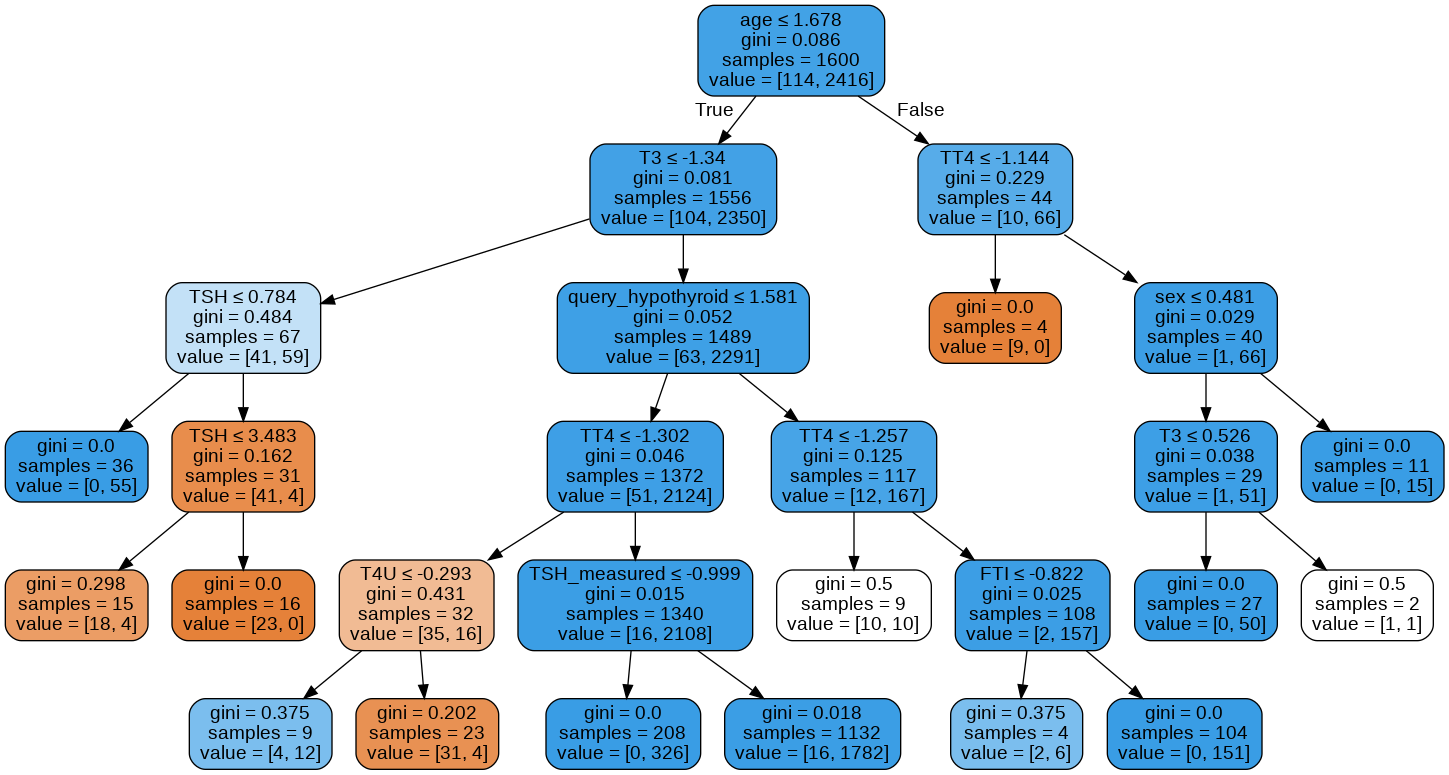

In [40]:
# Performance of individual decision trees
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid .png')
Image(graph.create_png())

In [41]:
# metrics for performance and Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
# Finding confusion matrics, accuracy score
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[ 27  10]
 [  1 595]]
              precision    recall  f1-score   support

 hypothyroid       0.96      0.73      0.83        37
    negative       0.98      1.00      0.99       596

    accuracy                           0.98       633
   macro avg       0.97      0.86      0.91       633
weighted avg       0.98      0.98      0.98       633

0.9826224328593997


The model predict with accuracy of 98.26% after turning the parameters

In [43]:
  importances = list(tree.feature_importances_)

  # We now use some Python magic to connect each feature with its importance
  # List of tuples with variable and importance
  feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

  print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
  print()

  # Nice to have: We can sort the values in descending order, since we care about the most important features first.
  feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

  # Print out the feature and importances 
  [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.27), ('T3_measured', 0.0), ('T3', 0.19), ('TT4_measured', 0.0), ('TT4', 0.46), ('T4U_measured', 0.0), ('T4U', 0.06), ('FTI_measured', 0.0), ('FTI', 0.01), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TT4                  Importance: 0.46
Variable: TSH                  Importance: 0.27
Variable: T3                   Importance: 0.19
Variable: T4U                  Importance: 0.06
Variable: age                  Importance: 0.01
Variable: FTI                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variabl

##The most important variables in the prediction of hypothyroid are TT4 , TSH and T3

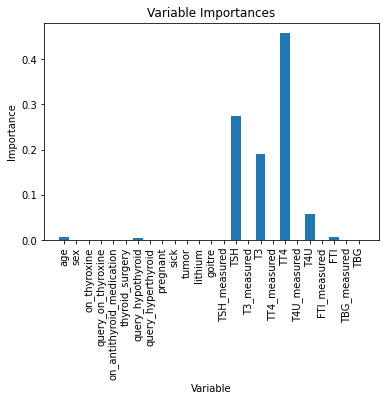

In [44]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

##Ada Boost

In [45]:
#Adaptive Boosting
hyp.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,52.260512,0.287069,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,5.046782,0.780272,1.865096,0.921277,107.995858,0.921593,0.978340,0.921910,114.039172,0.082200,28.269870
std,18.089308,0.452466,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,22.160083,0.414128,0.891612,0.269348,43.755469,0.268853,0.217513,0.268356,58.027055,0.274713,5.575519
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000,28.000000
50%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.000000,1.600000,1.000000,100.000000,1.000000,0.980000,1.000000,105.000000,0.000000,28.000000
75%,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.800000,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000,28.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000,122.000000


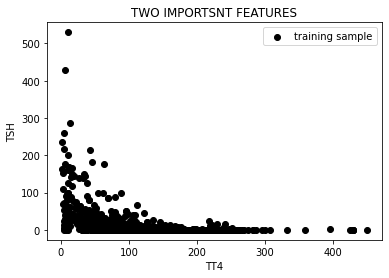

In [46]:
# Visualizing the set using the most important Features


X= hyp["TT4"]
y = hyp["TSH"]

plt.figure()
plt.scatter(X ,y, c='k',label="training sample")
plt.xlabel("TT4")
plt.ylabel("TSH")
plt.title("TWO IMPORTSNT FEATURES")
plt.legend()
plt.show()

In [47]:
# Importing ada boost classifier
from sklearn.ensemble import AdaBoostClassifier

In [48]:
#  Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)

In [50]:
# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

In [51]:
#Predict the response for test dataset
y_predict = model.predict(X_test)

In [53]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_predict))

Accuracy: 0.990521327014218


The model Adaboost has an accuracy of 99%
 

In [55]:
# Confusion matrix

conf_matrix = metrics.confusion_matrix(Y_test,y_predict)
conf_matrix

array([[ 32,   5],
       [  1, 595]])

In [57]:
# Finding confusion matrics, accuracy score
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))
print(metrics.accuracy_score(Y_test, y_predict))

[[ 32   5]
 [  1 595]]
              precision    recall  f1-score   support

 hypothyroid       0.97      0.86      0.91        37
    negative       0.99      1.00      0.99       596

    accuracy                           0.99       633
   macro avg       0.98      0.93      0.95       633
weighted avg       0.99      0.99      0.99       633

0.990521327014218


##Adaboost is giving accuracy of 99%

##Support Vector Machines

In [75]:
tsh_and_tt4 = hyp[['TSH', 'TT4']].values
# Put a label of either a muffin or not and assign it 0 or 1
type_label = np.where(hyp['status']=='hypothyroid',1,0)
#type_label = hyp['status'].cat.codes

In [68]:
#  Split the data into train and test set
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
y_test.shape

(633,)

In [71]:
X_test.shape

(633,)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


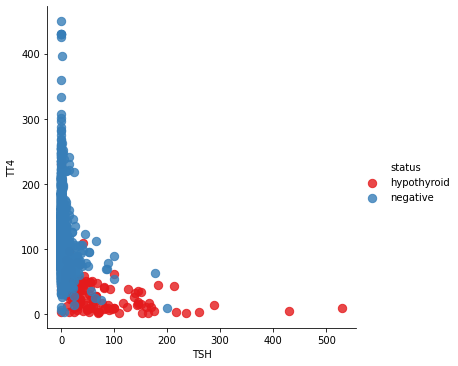

In [69]:
# Stating the classification cretia
sns.lmplot('TSH', 'TT4', data=hyp, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

##Linear

In [78]:
# Fitting the Model

model = SVC(kernel= 'linear')
model.fit(X_train,Y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
y_prediction_linear = model.predict(X_test)

In [85]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(Y_test,y_prediction)
model_accuracy

0.9083728278041074

The linear SVM model gives 90.8%

In [86]:
# Finding confusion matrics, accuracy score
print(confusion_matrix(Y_test,y_prediction))
print(classification_report(Y_test,y_prediction))
print(accuracy_score(Y_test, y_prediction))

[[  1  36]
 [ 22 574]]
              precision    recall  f1-score   support

 hypothyroid       0.04      0.03      0.03        37
    negative       0.94      0.96      0.95       596

    accuracy                           0.91       633
   macro avg       0.49      0.50      0.49       633
weighted avg       0.89      0.91      0.90       633

0.9083728278041074


##Polynomial analysis 

In [88]:

model = SVC(kernel= 'poly')
model.fit(X_train,Y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
y_prediction_poly = model.predict(X_test)

In [90]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(Y_test,y_prediction)
model_accuracy

0.9004739336492891

The polynomial accuracy is the same as linear accuracy 

## rbf kernel 

In [91]:
model = SVC(kernel= 'rbf')
model.fit(X_train,Y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
y_prediction_rbf = model.predict(X_test)

In [93]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(Y_test,y_prediction)
model_accuracy

0.9083728278041074

rbf accuracy is the same as linear

In [99]:
# Running all  models to check the accuracy

# A summary of my accuracy score for different models that i used
# print("Decison_Accuracy:",metrics.accuracy_score(y_test, y_pred_decision))  
print("random_Accuracy:",metrics.accuracy_score(Y_test, y_pred))  
print("adaboost_Accuracy:",metrics.accuracy_score(Y_test, y_predict))
print("svc_Accuracy with polynomial karnel:",metrics.accuracy_score(Y_test, y_prediction_poly))
print("svc_Accuracy with linear karnel:",metrics.accuracy_score(Y_test, y_prediction_linear)) 
print("svc_1_Accuracy with rbf karnel:",metrics.accuracy_score(Y_test, y_prediction_rbf))

random_Accuracy: 0.9826224328593997
adaboost_Accuracy: 0.990521327014218
svc_Accuracy with polynomial karnel: 0.9083728278041074
svc_Accuracy with linear karnel: 0.9083728278041074
svc_1_Accuracy with rbf karnel: 0.9083728278041074


##Summary of the analysis 

The model implemented in the analysis of this data 

Part 1 

Decision tree : Random forest and Adaboost classifier 

Part 2

Support Victor Machine (SVM) : Linear and polynomial 

##Observation 

The model with the highest accuracy is the decission tree of Adaboost model type with 99% accuracy.